In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from IPython.display import display, Markdown, Latex

In [2]:
df_train = pd.read_csv('../Preprocessed Data/cleaned_dataset_train.csv')
df_test = pd.read_csv('../Preprocessed Data//cleaned_dataset_test.csv')
#df = pd.read_csv('../cleaned_dataset.csv')

In [3]:
X_train = df_train['comment'].fillna(" ").tolist()
Y_train = df_train['insult'].tolist()

X_test = df_test['comment'].fillna(" ").tolist()
Y_test = df_test['insult'].tolist()

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [4]:
from sklearn import svm
clf = svm.SVC(C=0.3,kernel='linear',probability=True)
clf.fit(X_train,Y_train)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predictions = clf.predict(X_test)
y_score = clf.decision_function(X_test)

from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report 

precision, recall, f_score, _ = precision_recall_fscore_support(Y_test, predictions)

print('Precision: ', precision, '  Recall: ', recall, '   F-score: ', f_score)

print(classification_report(Y_test, predictions))

Precision:  [0.81721346 0.88      ]   Recall:  [0.98157625 0.38095238]    F-score:  [0.89188561 0.53172205]
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      1954
          1       0.88      0.38      0.53       693

avg / total       0.83      0.82      0.80      2647



Text(0.5,1,'2-class Precision-Recall curve: AP=0.78')

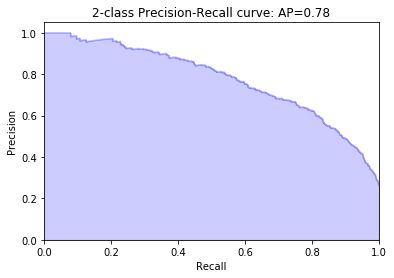

In [8]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(Y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [7]:
count = 0
for prediction in range(len(predictions)):
    if predictions[prediction] == Y_test[prediction]:
        count += 1
acc = count/len(predictions)
aoc = metrics.roc_auc_score(Y_test,predictions)
data = "**Accuracy** : " + str(acc) + "<br>" + "**AUC Score** : " + str(aoc) 
display(Markdown(data))       

**Accuracy** : 0.8243294295428787<br>**AUC Score** : 0.6812643173953307